In [1]:
import warnings
warnings.filterwarnings('default')

In [2]:
import numpy as np # Data Handling
import matplotlib.pyplot as plt # Data Visualization
import pandas as pd # # Data Handling
import os # Working Directory
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Transformation of Categorical columns into Numerical Values
from sklearn.compose import ColumnTransformer # Transformation same as level encoding and one hotencoding
from sklearn.model_selection import train_test_split # Splitting Data into Train & Test
from sklearn.preprocessing import StandardScaler # Neural Networks --> generally standarize the data
from sklearn.metrics import confusion_matrix # Model Evaluation 
from sklearn.metrics import classification_report # Model Evaluation 
import keras # Deep Learning Framework 

In [3]:
import os 
os.chdir(R'C:\Users\dipan\OneDrive\Desktop\BIA_MARRY\Stmarry_Hydrabad\ML Projects')
os.getcwd()

'C:\\Users\\dipan\\OneDrive\\Desktop\\BIA_MARRY\\Stmarry_Hydrabad\\ML Projects'

In [90]:
data = pd.read_excel('Accident_dataset.xlsx')


# Defining the problem statement: 
#### Create a Predictive model which can tell if a person will survive the urban and rural Area crash or not?
* Target Variable: Urban_or_Rural_Area
* Predictors: Day_of_Week,Junction_Contro,Junction_Detail,Accident_Severity	 etc.


* Urban_Area=0 The Accedint prone
* Rural_Area=1 The Accedint prone

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

In [91]:
data['Urban_or_Rural_Area'].value_counts()

Urban    198532
Rural    109441
Name: Urban_or_Rural_Area, dtype: int64

In [92]:
# Urban_or_Rural_Area=pd.DataFrame(data1["Urban_or_Rural_Area"].value_counts())
Urban_or_Rural_Area = data['Urban_or_Rural_Area'].value_counts().rename_axis('Urban_or_Rural_Area').reset_index(name='Freq')
Urban_or_Rural_Area

,Urban_or_Rural_Area,Freq
0,Urban,198532
1,Rural,109441


<AxesSubplot:xlabel='Urban_or_Rural_Area'>

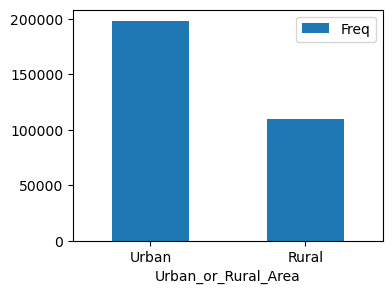

In [93]:
Urban_or_Rural_Area.plot.bar(x='Urban_or_Rural_Area',figsize=(4,3), y='Freq', rot=0)

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the survival of the passenger?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [94]:
data.head(5)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [95]:
data.tail(5)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
307968,201091NM01760,2022-02-18,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,None,...,2,1,Northern,Dry,Single carriageway,60,07:00:00,Rural,Fine no high winds,Car
307969,201091NM01881,2022-02-21,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,None,...,1,1,Northern,Frost or ice,Single carriageway,60,03:00:00,Rural,Fine no high winds,Car
307970,201091NM01935,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,None,...,1,3,Northern,Frost or ice,Single carriageway,30,09:38:00,Rural,Fine no high winds,Car
307971,201091NM01964,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,None,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25:00,Rural,Fine no high winds,Motorcycle over 500cc
307972,201091NM02142,2022-02-28,Sunday,Give way or uncontrolled,T or staggered junction,Serious,57.575210,Daylight,Highland,Other object on road,...,1,1,Northern,Wet or damp,Dual carriageway,60,15:45:00,Rural,Snowing no high winds,Car


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Light_Conditions            307973 non-null  object        
 8   Local_Authority_(District)  307973 non-null  object        
 9   Carriageway_Hazards         307970 non-null  object        
 10  Longitude                   307973 non-null  float64       
 11  Number_of_Casualties        307973 non-

In [97]:
data.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


In [98]:
data.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [99]:
data.shape

(307973, 21)

In [100]:
data.nunique()

Accident_Index                197644
Accident Date                    730
Day_of_Week                        7
Junction_Control                   7
Junction_Detail                    9
Accident_Severity                  3
Latitude                      264362
Light_Conditions                   5
Local_Authority_(District)       422
Carriageway_Hazards                6
Longitude                     269856
Number_of_Casualties              28
Number_of_Vehicles                17
Police_Force                      51
Road_Surface_Conditions            5
Road_Type                          5
Speed_limit                        8
Time                            1439
Urban_or_Rural_Area                2
Weather_Conditions                 8
Vehicle_Type                      15
dtype: int64

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [101]:
data.isnull().sum()

Accident_Index                   0
Accident Date                    0
Day_of_Week                      0
Junction_Control                 0
Junction_Detail                  0
Accident_Severity                0
Latitude                         0
Light_Conditions                 0
Local_Authority_(District)       0
Carriageway_Hazards              3
Longitude                        0
Number_of_Casualties             0
Number_of_Vehicles               0
Police_Force                     0
Road_Surface_Conditions        317
Road_Type                     1534
Speed_limit                      0
Time                            17
Urban_or_Rural_Area              0
Weather_Conditions            6057
Vehicle_Type                     0
dtype: int64

In [102]:
percentage_mising=data.isnull().sum()*100/len(data)

In [103]:
print(percentage_mising)

Accident_Index                0.000000
Accident Date                 0.000000
Day_of_Week                   0.000000
Junction_Control              0.000000
Junction_Detail               0.000000
Accident_Severity             0.000000
Latitude                      0.000000
Light_Conditions              0.000000
Local_Authority_(District)    0.000000
Carriageway_Hazards           0.000974
Longitude                     0.000000
Number_of_Casualties          0.000000
Number_of_Vehicles            0.000000
Police_Force                  0.000000
Road_Surface_Conditions       0.102931
Road_Type                     0.498096
Speed_limit                   0.000000
Time                          0.005520
Urban_or_Rural_Area           0.000000
Weather_Conditions            1.966731
Vehicle_Type                  0.000000
dtype: float64


In [104]:
# Replace space values with null in the entire DataFrame
data.replace("None", pd.NA, inplace=True)
data.replace(to_replace=None, value=pd.NA, inplace=True)

TypeError: 'regex' must be a string or a compiled regular expression or a list or dict of strings or regular expressions, you passed a 'bool'

In [ ]:
data.isnull().sum()

In [105]:
percentage_mising=data.isnull().sum()*100/len(data)
print(percentage_mising)

Accident_Index                 0.000000
Accident Date                  0.000000
Day_of_Week                    0.000000
Junction_Control               0.000000
Junction_Detail                0.000000
Accident_Severity              0.000000
Latitude                       0.000000
Light_Conditions               0.000000
Local_Authority_(District)     0.000000
Carriageway_Hazards           98.238807
Longitude                      0.000000
Number_of_Casualties           0.000000
Number_of_Vehicles             0.000000
Police_Force                   0.000000
Road_Surface_Conditions        0.102931
Road_Type                      0.498096
Speed_limit                    0.000000
Time                           0.005520
Urban_or_Rural_Area            0.000000
Weather_Conditions             1.966731
Vehicle_Type                   0.000000
dtype: float64


In [106]:
data1=data.drop('Carriageway_Hazards', axis=1) 

In [107]:
data1.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [108]:
#data1['Carriageway_Hazards'].fillna(data['Carriageway_Hazards'].mode()[0], inplace=True)
data1['Road_Surface_Conditions'].fillna(data['Road_Surface_Conditions'].mode()[0], inplace=True)
data1['Road_Type'].fillna(data['Road_Type'].mode()[0], inplace=True)
data1['Weather_Conditions'].fillna(data['Weather_Conditions'].mode()[0], inplace=True)

In [109]:
data1.isnull().sum()

Accident_Index                 0
Accident Date                  0
Day_of_Week                    0
Junction_Control               0
Junction_Detail                0
Accident_Severity              0
Latitude                       0
Light_Conditions               0
Local_Authority_(District)     0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Police_Force                   0
Road_Surface_Conditions        0
Road_Type                      0
Speed_limit                    0
Time                          17
Urban_or_Rural_Area            0
Weather_Conditions             0
Vehicle_Type                   0
dtype: int64

In [110]:
data1['Time'].isnull().sum()

17

In [111]:
data1['Time']

0         15:11:00
1         10:59:00
2         14:19:00
3         08:10:00
4         17:25:00
            ...   
307968    07:00:00
307969    03:00:00
307970    09:38:00
307971    18:25:00
307972    15:45:00
Name: Time, Length: 307973, dtype: object

In [112]:
data1.shape

(307973, 20)

# Removing useless columns from the data

In [113]:
data1.tail(2)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
307971,201091NM01964,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Northern,Wet or damp,Single carriageway,60,18:25:00,Rural,Fine no high winds,Motorcycle over 500cc
307972,201091NM02142,2022-02-28,Sunday,Give way or uncontrolled,T or staggered junction,Serious,57.575210,Daylight,Highland,-3.895673,1,1,Northern,Wet or damp,Dual carriageway,60,15:45:00,Rural,Snowing no high winds,Car


In [114]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Accident_Index','Latitude','Local_Authority_(District)','Longitude','Accident Date','Police_Force',]
Accedentdata =data1.drop(UselessColumns,axis=1)
Accedentdata.head(4)

,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,Thursday,Give way or uncontrolled,T or staggered junction,Serious,Daylight,1,2,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,Monday,Give way or uncontrolled,Crossroads,Serious,Daylight,11,2,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,Sunday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,1,2,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,Monday,Auto traffic signal,T or staggered junction,Serious,Daylight,1,2,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc


# FEATURE ENGINEERING

In [59]:
Accedentdata['Time']

0         15:11:00
1         10:59:00
2         14:19:00
3         08:10:00
4         17:25:00
            ...   
307968    07:00:00
307969    03:00:00
307970    09:38:00
307971    18:25:00
307972    15:45:00
Name: Time, Length: 307973, dtype: object

In [118]:
Accedentdata['Time'] = pd.to_datetime(Accedentdata['Time'], format="%H:%M:%S")
#bin_edges = [0, 6, 9, 12, 15, 18, 21, 24]
#bin_labels = ['late_night', 'early_morning', 'morning', 'noon', 'afternoon', 'evening', 'night']
#Accedentdata['Categorized_Time'] = pd.cut(Accedentdata['Time'].dt.hour , bins=bin_edges , labels=bin_labels , right=False).astype('category')
#df[['Time' , 'Categorized_Time']]

In [119]:
Accedentdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Day_of_Week              307973 non-null  object        
 1   Junction_Control         307973 non-null  object        
 2   Junction_Detail          307973 non-null  object        
 3   Accident_Severity        307973 non-null  object        
 4   Light_Conditions         307973 non-null  object        
 5   Number_of_Casualties     307973 non-null  int64         
 6   Number_of_Vehicles       307973 non-null  int64         
 7   Road_Surface_Conditions  307973 non-null  object        
 8   Road_Type                307973 non-null  object        
 9   Speed_limit              307973 non-null  int64         
 10  Time                     307956 non-null  datetime64[ns]
 11  Urban_or_Rural_Area      307973 non-null  object        
 12  Weather_Conditio

In [120]:

# convert to datetime using pd.to_datetime with predefined format
Accedentdata['date'] = pd.to_datetime(Accedentdata['Time'], format='%B %d, %Y')
print(Accedentdata['date'])

0        1900-01-01 15:11:00
1        1900-01-01 10:59:00
2        1900-01-01 14:19:00
3        1900-01-01 08:10:00
4        1900-01-01 17:25:00
                 ...        
307968   1900-01-01 07:00:00
307969   1900-01-01 03:00:00
307970   1900-01-01 09:38:00
307971   1900-01-01 18:25:00
307972   1900-01-01 15:45:00
Name: date, Length: 307973, dtype: datetime64[ns]


In [121]:
data1.head(2)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted five categorical predictors in the data

Categorical Predictors: 
'Day_of_Week', 'Junction_Control', 'Junction_Detail','Accident_Severity','Light_Conditions','Number_of_Casualties','Number_of_Vehicles','Police_Force','Road_Surface_Conditions','Road_Type','Speed_limit','Time','Urban_or_Rural_Area','Weather_Conditions','Vehicle_Type'

We use bar charts to see how the data is distributed for these categorical columns.

In [122]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

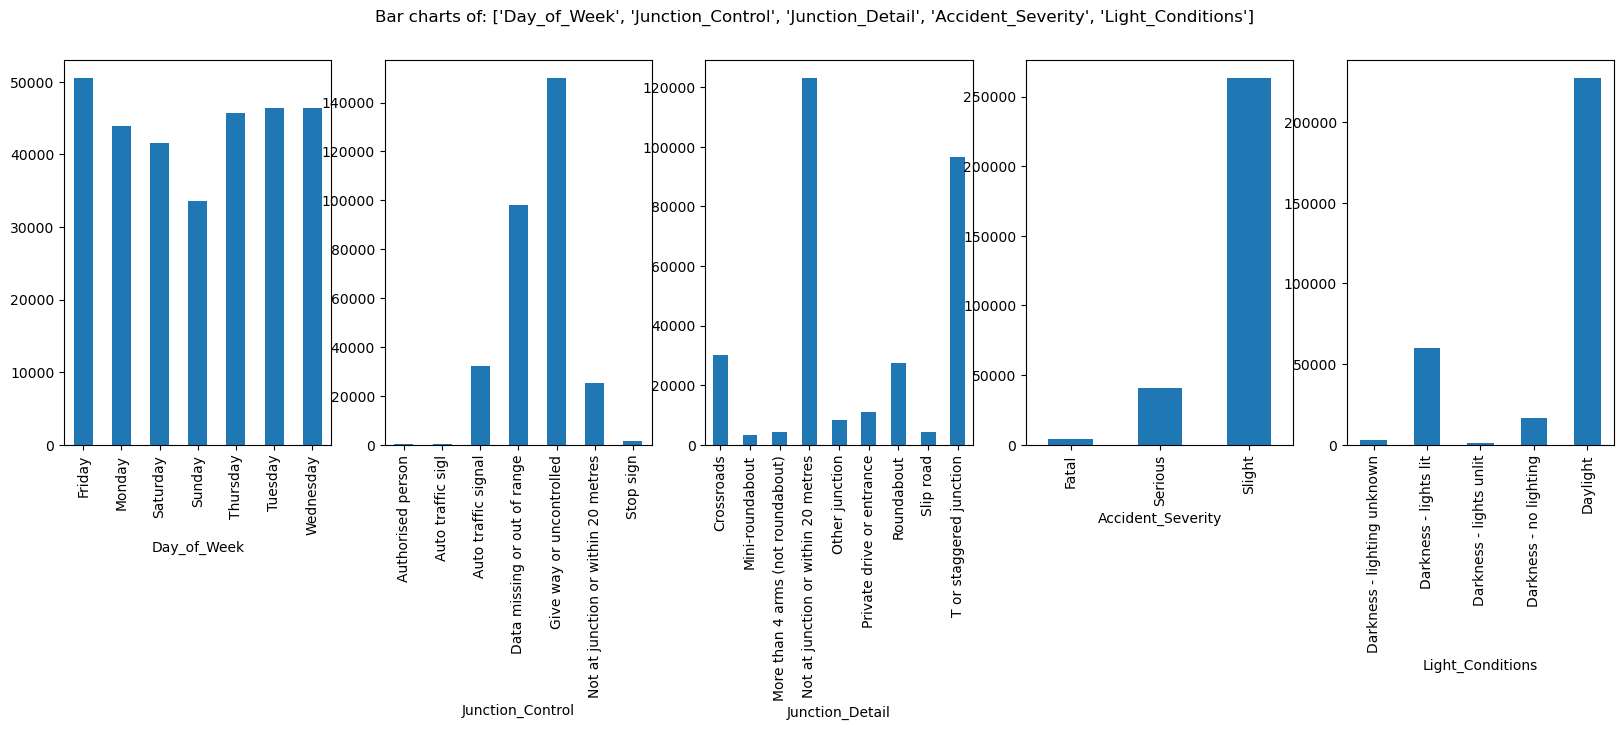

In [123]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=Accedentdata, colsToPlot=['Day_of_Week', 'Junction_Control', 'Junction_Detail','Accident_Severity','Light_Conditions'])

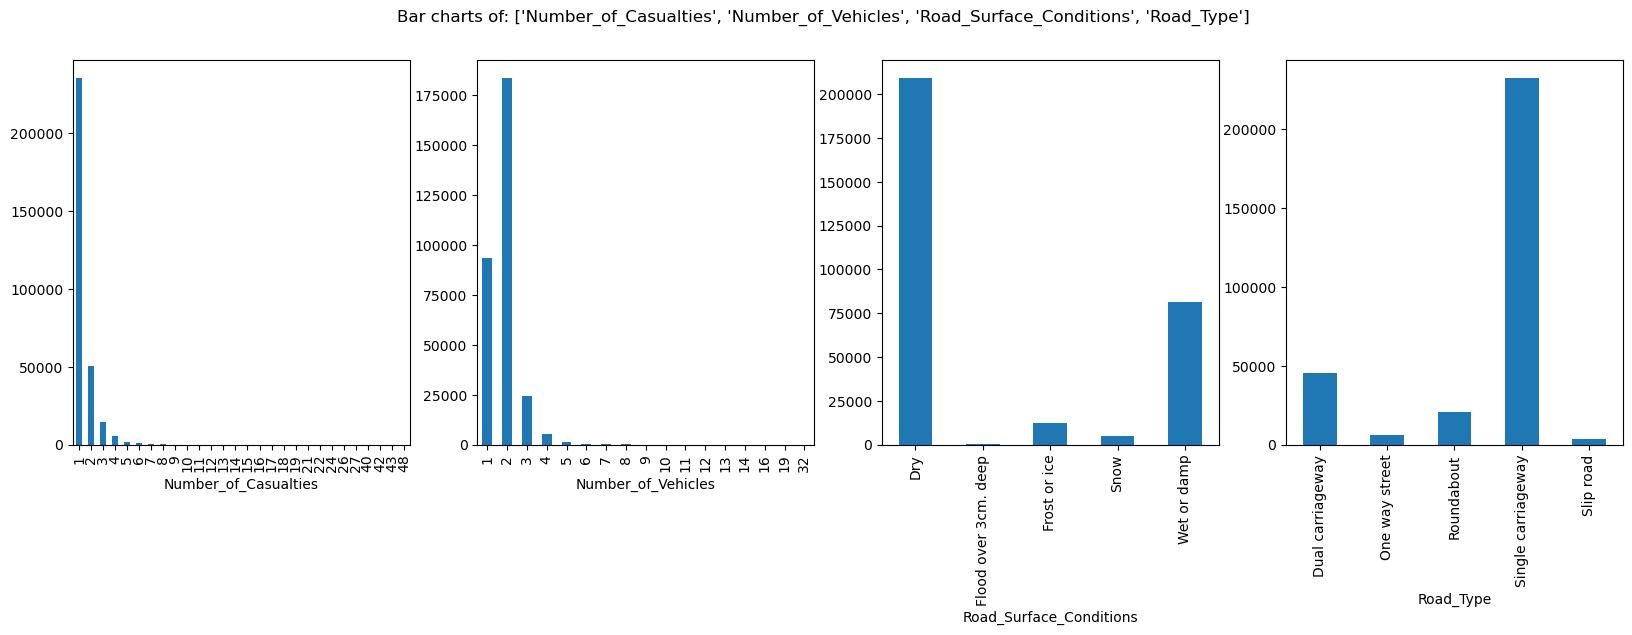

In [124]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=Accedentdata, colsToPlot=['Number_of_Casualties','Number_of_Vehicles','Road_Surface_Conditions','Road_Type',])

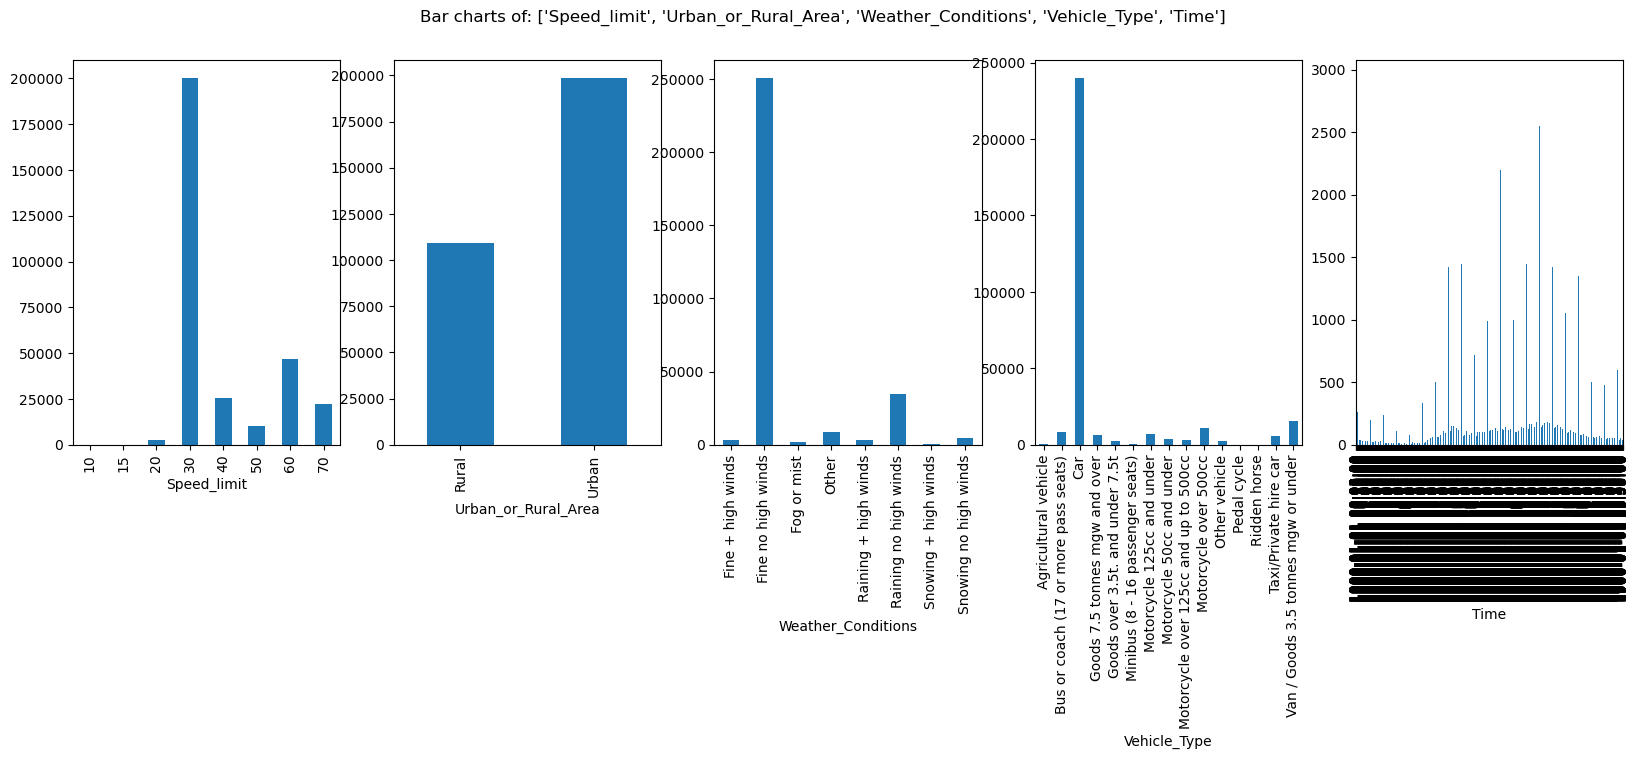

In [125]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=Accedentdata, colsToPlot=['Speed_limit','Urban_or_Rural_Area','Weather_Conditions','Vehicle_Type','Time'])

## Treating Imbalance in categorical predictors

In [126]:
# Grouping the SibSP values 2,3,4,5,8 in one single bucket as 2
Accedentdata['Number_of_Casualties'][Accedentdata['Number_of_Casualties']>=6]="MORE_THAN_6"
Accedentdata['Number_of_Vehicles'][Accedentdata['Number_of_Vehicles']>=5]="MORE_THAN_5"

C:\Users\dipan\AppData\Local\Temp\ipykernel_2452\1810676098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accedentdata['Number_of_Casualties'][Accedentdata['Number_of_Casualties']>=6]="MORE_THAN_6"
C:\Users\dipan\AppData\Local\Temp\ipykernel_2452\1810676098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accedentdata['Number_of_Vehicles'][Accedentdata['Number_of_Vehicles']>=5]="MORE_THAN_5"


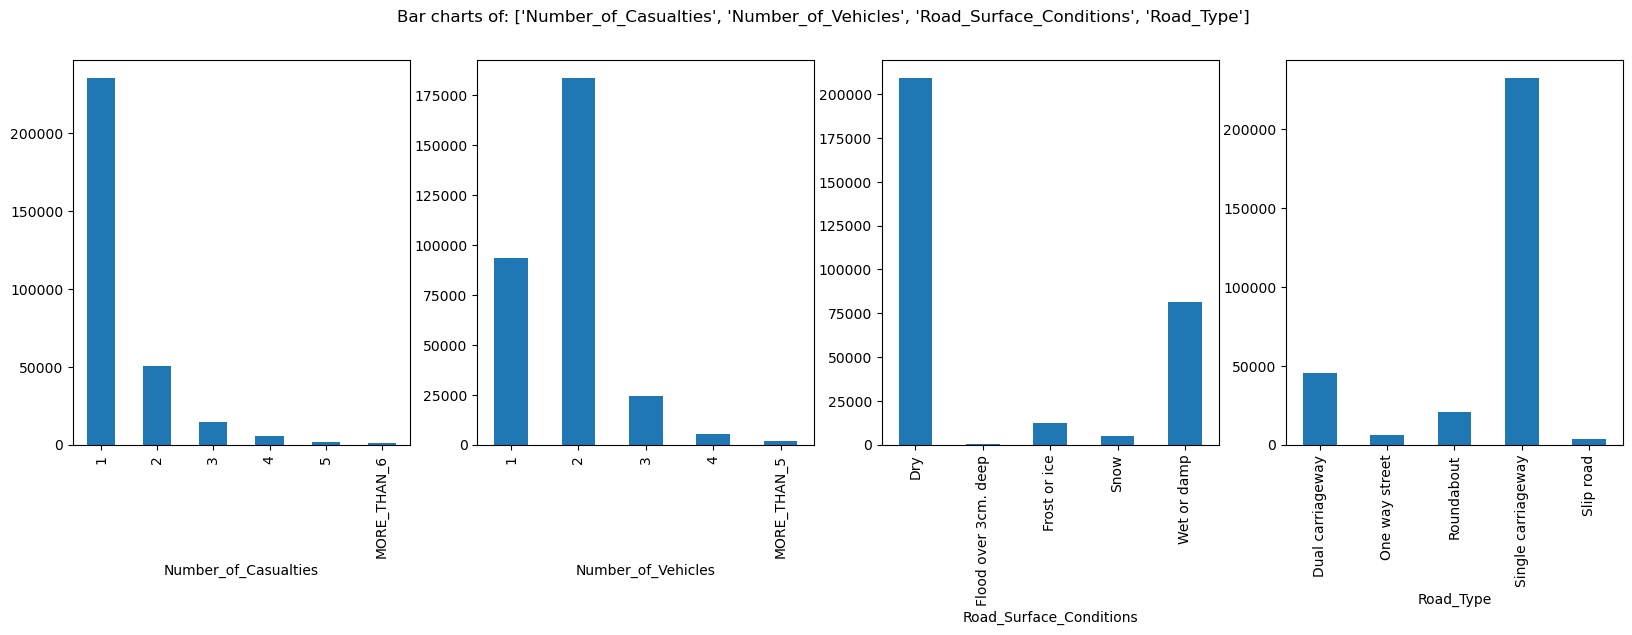

In [127]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=Accedentdata, colsToPlot=['Number_of_Casualties','Number_of_Vehicles','Road_Surface_Conditions','Road_Type',])

In [128]:
Accedentdata['Vehicle_Type'][Accedentdata['Vehicle_Type']!='Car']="Other_4Whiler_Car"
Accedentdata['Speed_limit'][Accedentdata['Speed_limit']<=20]="Less_than_Speed_20"

C:\Users\dipan\AppData\Local\Temp\ipykernel_2452\140382834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accedentdata['Vehicle_Type'][Accedentdata['Vehicle_Type']!='Car']="Other_4Whiler_Car"
C:\Users\dipan\AppData\Local\Temp\ipykernel_2452\140382834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accedentdata['Speed_limit'][Accedentdata['Speed_limit']<=20]="Less_than_Speed"


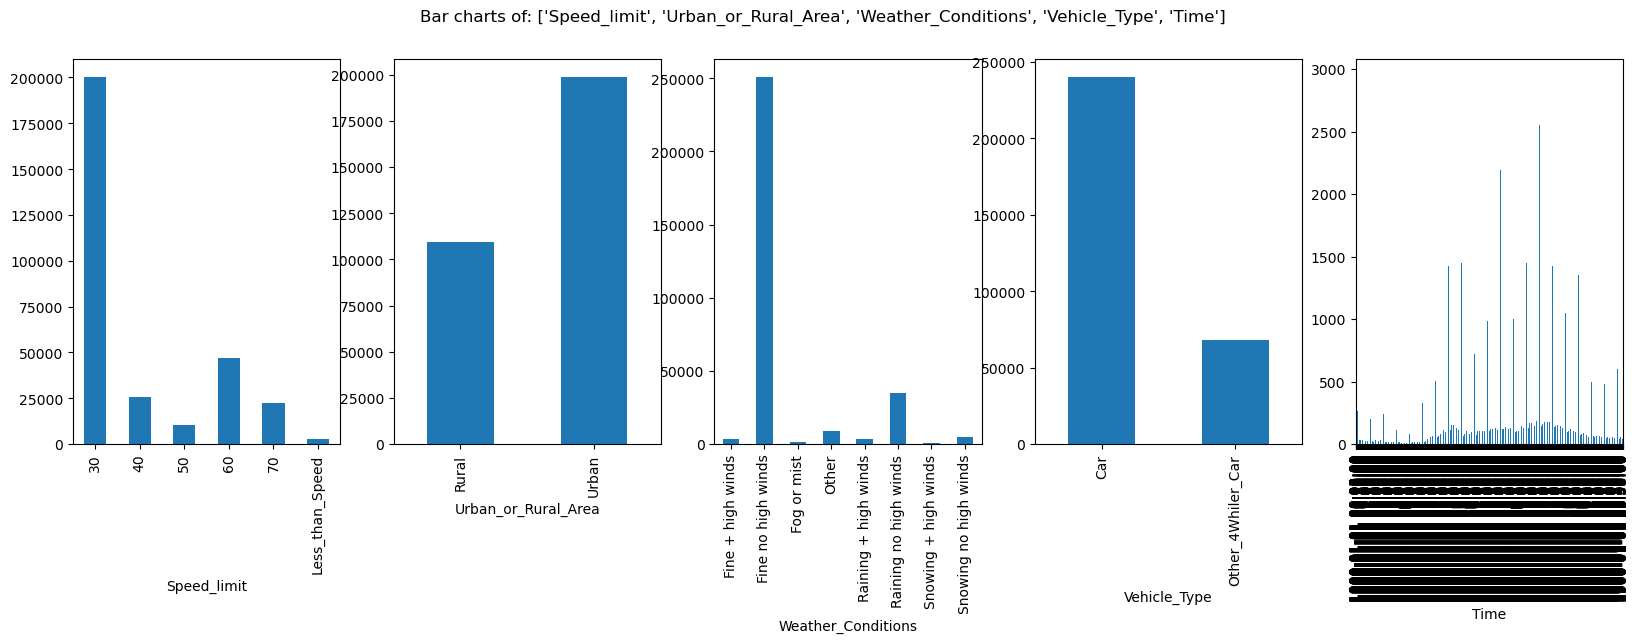

In [129]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=Accedentdata, colsToPlot=['Speed_limit','Urban_or_Rural_Area','Weather_Conditions','Vehicle_Type','Time'])

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except have satisfactory distribution to be considered for machine learning.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'Day_of_Week', 'Junction_Control', 'Junction_Detail','Accident_Severity','Light_Conditions','Number_of_Casualties','Number_of_Vehicles' etc

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is categorical, hence below two scenarios will be present

* Categorical Target Variable Vs Categorical Predictor

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

In [130]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=Accedentdata['Junction_Control'], columns=Accedentdata['Urban_or_Rural_Area'])
CrossTabResult

Urban_or_Rural_Area,Rural,Urban
Junction_Control,,
Authorised person,132,328
Auto traffic sigl,17,76
Auto traffic signal,3033,29223
Data missing or out of range,49191,48865
Give way or uncontrolled,41496,108549
Not at junction or within 20 metres,14914,10464
Stop sign,658,1027


In [131]:
Accedentdata.columns

Index(['Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'date'],
      dtype='object')

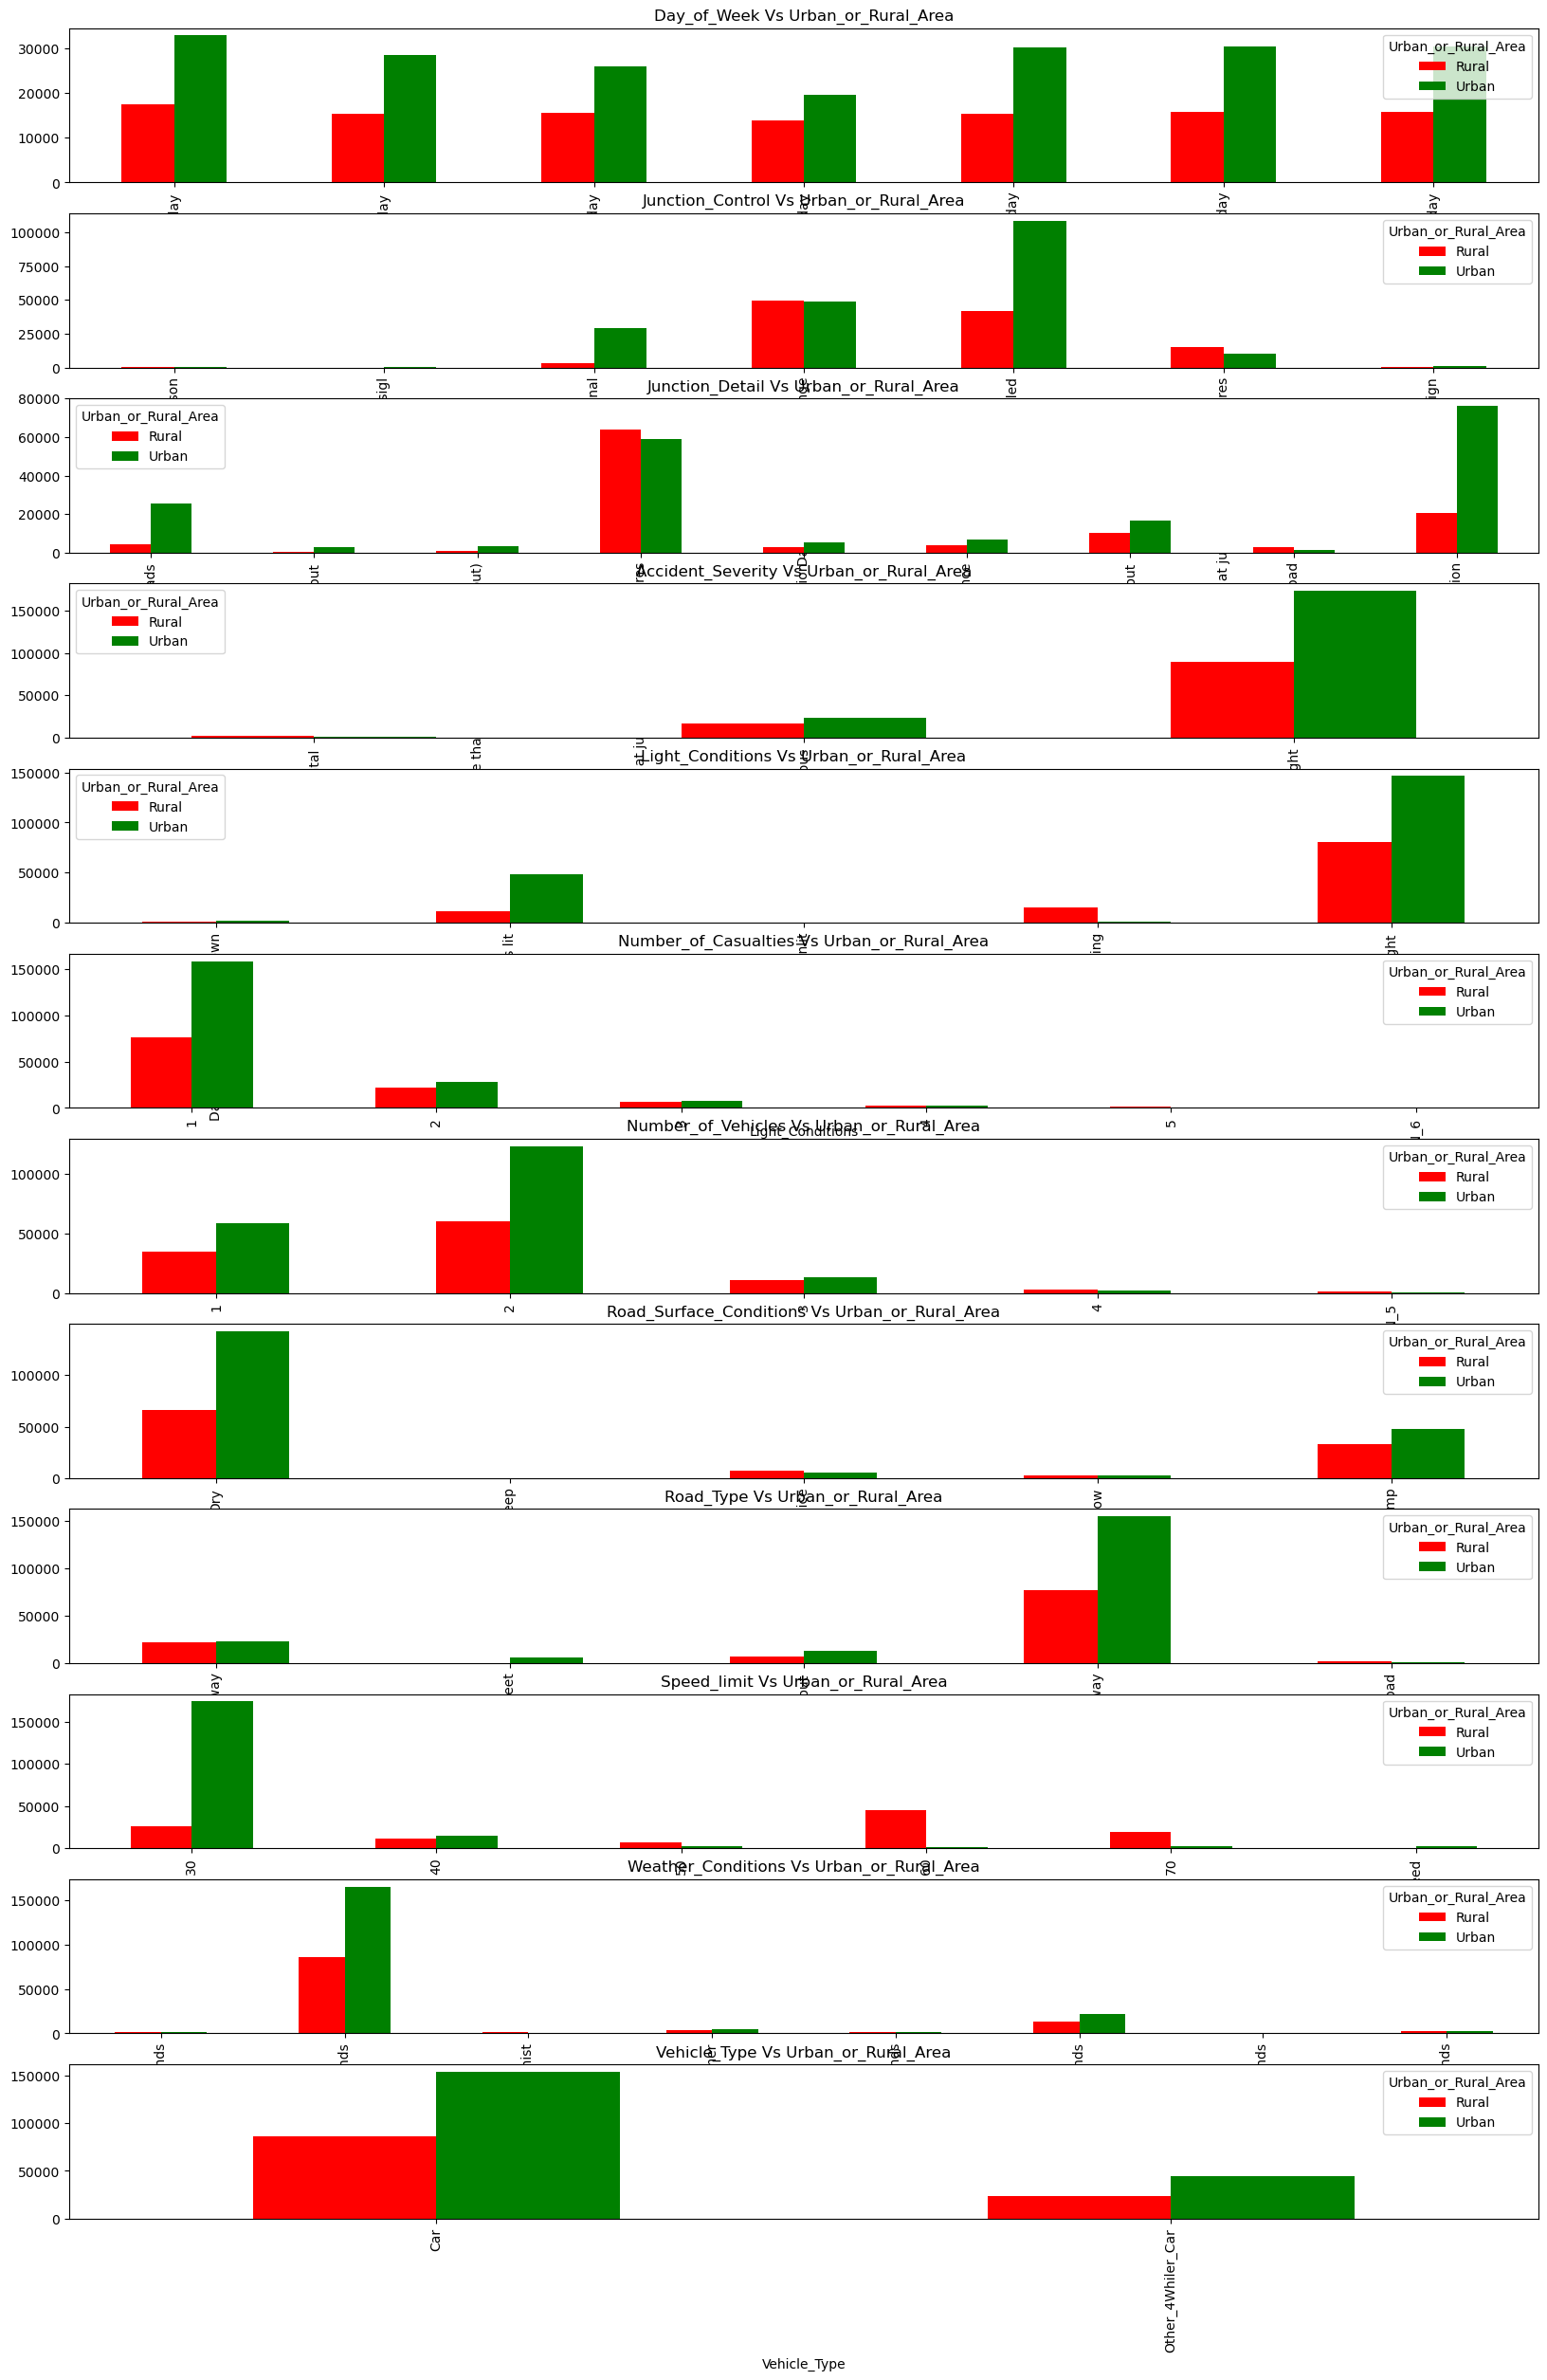

In [134]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Day_of_Week', 'Junction_Control', 'Junction_Detail','Accident_Severity','Light_Conditions','Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Speed_limit','Weather_Conditions',
       'Vehicle_Type']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(20,30))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=Accedentdata[CategoricalCol], columns=Accedentdata['Urban_or_Rural_Area'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Urban_or_Rural_Area')

# Grouped Bar charts Interpretation
<b>What to look for in these grouped bar charts?</b>

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. 
If the ratio of bars is similar across all categories, then the two columns are not correlated. 

On the other hand, look at the Sex vs Survived plot. The bars are different for each category, Hence, two columns are correlated with each other.

We confirm this analysis in below section by using Chi-Square Tests.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True
* More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [138]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [140]:
CategoricalVariables=['Day_of_Week', 'Junction_Control', 'Junction_Detail','Accident_Severity','Light_Conditions','Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Speed_limit','Weather_Conditions',
       'Vehicle_Type']

# Calling the function
FunctionChisq(inpData=Accedentdata, 
              TargetVariable='Urban_or_Rural_Area',
              CategoricalVariablesList= CategoricalVariables)

Day_of_Week is correlated with Urban_or_Rural_Area | P-Value: 2.6488176222656936e-145
Junction_Control is correlated with Urban_or_Rural_Area | P-Value: 0.0
Junction_Detail is correlated with Urban_or_Rural_Area | P-Value: 0.0
Accident_Severity is correlated with Urban_or_Rural_Area | P-Value: 0.0
Light_Conditions is correlated with Urban_or_Rural_Area | P-Value: 0.0
Number_of_Casualties is correlated with Urban_or_Rural_Area | P-Value: 0.0
Number_of_Vehicles is correlated with Urban_or_Rural_Area | P-Value: 0.0
Road_Surface_Conditions is correlated with Urban_or_Rural_Area | P-Value: 0.0
Road_Type is correlated with Urban_or_Rural_Area | P-Value: 0.0
Speed_limit is correlated with Urban_or_Rural_Area | P-Value: 0.0
Weather_Conditions is correlated with Urban_or_Rural_Area | P-Value: 0.0
Vehicle_Type is correlated with Urban_or_Rural_Area | P-Value: 1.1427951098740072e-06


['Day_of_Week',
 'Junction_Control',
 'Junction_Detail',
 'Accident_Severity',
 'Light_Conditions',
 'Number_of_Casualties',
 'Number_of_Vehicles',
 'Road_Surface_Conditions',
 'Road_Type',
 'Speed_limit',
 'Weather_Conditions',
 'Vehicle_Type']

## End of EDA

<AxesSubplot:xlabel='Day_of_Week'>

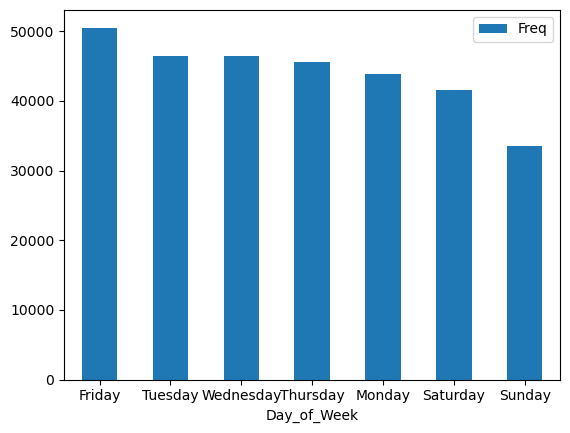

In [36]:
Day_of_Week.plot.bar(x='Day_of_Week', y='Freq', rot=0)

In [37]:
data1.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [38]:
# Urban_or_Rural_Area=pd.DataFrame(data1["Urban_or_Rural_Area"].value_counts())
Urban_or_Rural_Area = data1['Junction_Control'].value_counts().rename_axis('Junction_Control').reset_index(name='Freq')
Urban_or_Rural_Area

,Junction_Control,Freq
0,Give way or uncontrolled,150045
1,Data missing or out of range,98056
2,Auto traffic signal,32256
3,Not at junction or within 20 metres,25378
4,Stop sign,1685
5,Authorised person,460
6,Auto traffic sigl,93


<AxesSubplot:xlabel='Junction_Control'>

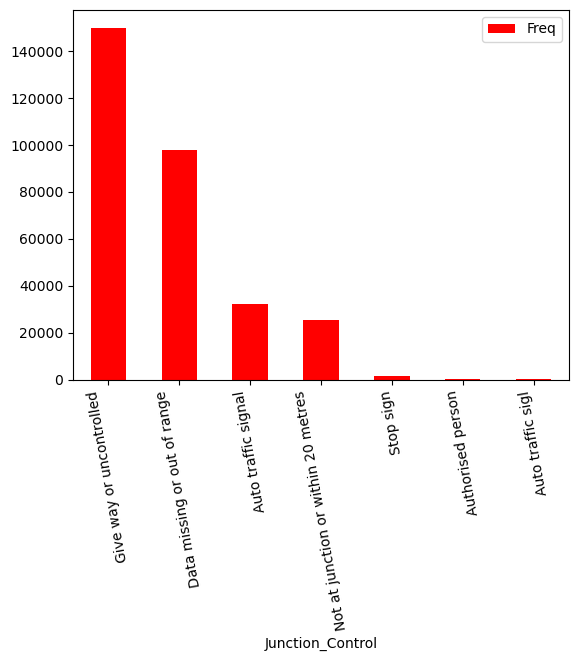

In [39]:
Urban_or_Rural_Area.plot.bar(x='Junction_Control', y='Freq',color ='r', rot=100)

In [40]:
data1['Urban_or_Rural_Area'].value_counts()

Urban    198532
Rural    109441
Name: Urban_or_Rural_Area, dtype: int64

In [41]:
#Distribution 0 and 1 for diagnosis column
data1.Urban_or_Rural_Area.value_counts()

Urban    198532
Rural    109441
Name: Urban_or_Rural_Area, dtype: int64

In [42]:
data1['Urban_or_Rural_Area'] = data1['Urban_or_Rural_Area'].map({'Urban':1, 'Rural':0})
data1.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,1,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,1,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,1,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,1,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,1,Fine no high winds,Car


In [43]:
feature_space = data1.iloc[:, data1.columns != 'Urban_or_Rural_Area']# Independent Data Matrix
feature_space

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2022-02-18,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,-3.467828,2,1,Northern,Dry,Single carriageway,60,07:00:00,Fine no high winds,Car
307969,201091NM01881,2022-02-21,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Northern,Frost or ice,Single carriageway,60,03:00:00,Fine no high winds,Car
307970,201091NM01935,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,-3.862727,1,3,Northern,Frost or ice,Single carriageway,30,09:38:00,Fine no high winds,Car
307971,201091NM01964,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Northern,Wet or damp,Single carriageway,60,18:25:00,Fine no high winds,Motorcycle over 500cc


In [44]:
feature_class = data1.iloc[:, data1.columns == 'Urban_or_Rural_Area']# Independent Data Matrix
feature_class

,Urban_or_Rural_Area
0,1
1,1
2,1
3,1
4,1
...,...
307968,0
307969,0
307970,0
307971,0


In [45]:
training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 42) # random state ensures replicability 


In [47]:
 data1.nunique()

Accident_Index                197644
Accident Date                    730
Day_of_Week                        7
Junction_Control                   7
Junction_Detail                    9
Accident_Severity                  3
Latitude                      264362
Light_Conditions                   5
Local_Authority_(District)       422
Longitude                     269856
Number_of_Casualties              28
Number_of_Vehicles                17
Police_Force                      51
Road_Surface_Conditions            5
Road_Type                          5
Speed_limit                        8
Time                            1439
Urban_or_Rural_Area                2
Weather_Conditions                 8
Vehicle_Type                      15
dtype: int64

# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted six categorical predictors in the data

<b>Categorical Predictors: </b>

'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Light_Conditions', 'Doors'
    
We use bar charts to see how the data is distributed for these categorical columns.

In [48]:
data1.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

In [ ]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=CarPricesData, colsToPlot=['FuelType', 'HP', 'MetColor', 
                                                 'Automatic', 'CC', 'Doors'])

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors'

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, Three continuous predictor variables 'ApplicantIncome', 'CoapplicantIncome',and 'LoanAmount'.

In [ ]:
# Plotting histograms of multiple columns together
CarPricesData.hist(['Price','Age','KM','Weight'], figsize=(18,10))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Age", there are around 300 rows in data that has a value between 70 to 80.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>Price</b> : Selected. The distribution is good. Outliers are seen near 30000, need to treat them
* <b>KM</b>: Selected. The distribution is good.
* <b>Age</b>: Selected. The distribution is good.
* <b>Weight</b>: Selected. The distribution is good. Outliers are seen beyond 1400, need to treat them.

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.